In [1]:
from FinancialMachineLearning.barsampling.standard_bar_features import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('..')
os.chdir('..')
os.getcwd()

'/Users/junghunlee/Desktop/Pycharm/FinancialMachineLearning'

In [6]:
data = pd.read_csv('./Data/clean_data.csv', index_col = 0)
data

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00
2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98
2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00
2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00
2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00
...,...,...,...,...,...,...
2018-10-05 15:59:59,116.20,116.18,116.19,2000,2000,232400.00
2018-10-05 15:59:59,116.20,116.18,116.19,3900,3900,453180.00
2018-10-05 16:00:00,116.22,116.20,116.21,42884,42884,4983978.48


In [8]:
new_data = pd.concat([pd.Series(data.index), 
                      pd.Series(data['price'].values), 
                      pd.Series(data['v'].values)], axis=1)
new_data.columns = ['date', 'price', 'volume']
print(new_data.head())

                  date  price  volume
0  2009-09-28 09:30:00  50.79     100
1  2009-09-28 09:30:00  50.71     638
2  2009-09-28 09:31:32  50.75     100
3  2009-09-28 09:31:33  50.75     100
4  2009-09-28 09:31:50  50.75     300


In [9]:
new_data.to_csv('./Data/raw_tick_data.csv', index=False)

In [10]:
test = pd.read_csv('./Data/raw_tick_data.csv', index_col = 0)
test

,price,volume
date,,
2009-09-28 09:30:00,50.79,100
2009-09-28 09:30:00,50.71,638
2009-09-28 09:31:32,50.75,100
2009-09-28 09:31:33,50.75,100
2009-09-28 09:31:50,50.75,300
...,...,...
2018-10-05 15:59:59,116.20,2000
2018-10-05 15:59:59,116.20,3900
2018-10-05 16:00:00,116.22,42884


#### Tick Bar

In [17]:
tick = tickBar('./Data/raw_tick_data.csv', threshold = 100, batch_size = 1000000)
tick

Reading data in batches:
Batch number: 0
Batch number: 1
Returning bars 


,date_time,open,high,low,close,volume
0,2009-09-28 09:53:14,50.790,51.1500,50.7100,51.1500,34668
1,2009-09-28 10:02:52,51.130,51.2600,51.0800,51.2500,43141
2,2009-09-28 10:22:24,51.250,51.2900,51.1873,51.1961,51350
3,2009-09-28 10:38:44,51.250,51.3800,51.2300,51.3650,39237
4,2009-09-28 11:24:29,51.365,51.3650,51.2700,51.3200,52260
...,...,...,...,...,...,...
14157,2018-10-05 14:21:02,115.870,116.1400,115.7937,116.1167,48819
14158,2018-10-05 14:56:39,116.090,116.1633,116.0200,116.0600,30316
14159,2018-10-05 15:37:49,116.070,116.2200,116.0300,116.0565,38178
14160,2018-10-05 15:57:06,116.020,116.3200,115.9800,116.2100,36625


#### Volume Bar

In [18]:
volume = volumeBar('./Data/raw_tick_data.csv', threshold = 10000, batch_size = 1000000)

Reading data in batches:
Batch number: 0
Batch number: 1
Returning bars 


In [19]:
volume

,date_time,open,high,low,close,volume
0,2009-09-28 09:44:09,50.79,50.9100,50.710,50.9100,10544
1,2009-09-28 09:46:35,50.91,51.0700,50.910,51.0700,12600
2,2009-09-28 09:52:47,51.07,51.1480,51.050,51.1300,11224
3,2009-09-28 09:54:36,51.14,51.1500,51.130,51.1300,10151
4,2009-09-28 09:54:41,51.13,51.1400,51.129,51.1400,10400
...,...,...,...,...,...,...
60260,2018-10-05 15:58:08,116.20,116.2425,116.170,116.1800,10285
60261,2018-10-05 15:59:16,116.18,116.2125,116.150,116.1969,10527
60262,2018-10-05 15:59:46,116.19,116.2100,116.140,116.2100,10085
60263,2018-10-05 15:59:59,116.19,116.2000,116.190,116.2000,11100


#### Dollar Value Bar

In [21]:
dollar = dollarBar('./Data/raw_tick_data.csv', threshold = 1000000, batch_size = 1000000)
dollar

Reading data in batches:
Batch number: 0
Batch number: 1
Returning bars 


,date_time,open,high,low,close,volume
0,2009-09-28 09:46:35,50.7900,51.0700,50.710,51.07,19844
1,2009-09-28 09:53:49,51.0700,51.1500,51.050,51.14,20324
2,2009-09-28 09:55:26,51.1400,51.1500,51.129,51.14,19622
3,2009-09-28 10:02:52,51.1400,51.2600,51.080,51.25,22319
4,2009-09-28 10:10:21,51.2500,51.2900,51.190,51.29,21519
...,...,...,...,...,...,...
50761,2018-10-05 15:58:23,116.2425,116.2425,116.160,116.19,9647
50762,2018-10-05 15:59:20,116.2000,116.2125,116.150,116.18,8821
50763,2018-10-05 15:59:55,116.1800,116.2100,116.140,116.19,9196
50764,2018-10-05 15:59:59,116.2000,116.2000,116.190,116.20,9700


#### Bar Counting

In [24]:
tick.to_csv('./Data/tick_bar.csv', index = False)
volume.to_csv('./Data/volume_bar.csv', index = False)
dollar.to_csv('./Data/dollar_bar.csv', index = False)

In [30]:
data = pd.read_csv('./Data/raw_tick_data.csv', index_col=0, parse_dates=True)
dollar = pd.read_csv('./Data/dollar_bar.csv', index_col=0, parse_dates=True)
volume = pd.read_csv('./Data/volume_bar.csv', index_col=0, parse_dates=True)
tick = pd.read_csv('./Data/tick_bar.csv', index_col=0, parse_dates=True)

In [32]:
time_count = data['price'].resample('W', label = 'right').count()
tick_count = tick['close'].resample('W', label = 'right').count()
volume_count = volume['close'].resample('W', label = 'right').count()
dollar_count = dollar['close'].resample('W', label = 'right').count()

In [33]:
count_df = pd.concat([time_count, tick_count, volume_count, dollar_count], axis = 1)
count_df.columns = ['time', 'tick', 'volume', 'dollar']
count_df

,time,tick,volume,dollar
2009-10-04,5771,57,198,103
2009-10-11,2994,30,110,59
2009-10-18,3706,37,119,64
2009-10-25,3089,31,115,62
2009-11-01,4739,47,167,85
...,...,...,...,...
2018-09-09,3366,34,151,174
2018-09-16,2686,27,110,124
2018-09-23,3284,33,130,151
2018-09-30,3656,36,142,165


Text(0.5, 1.0, 'Bar Count')

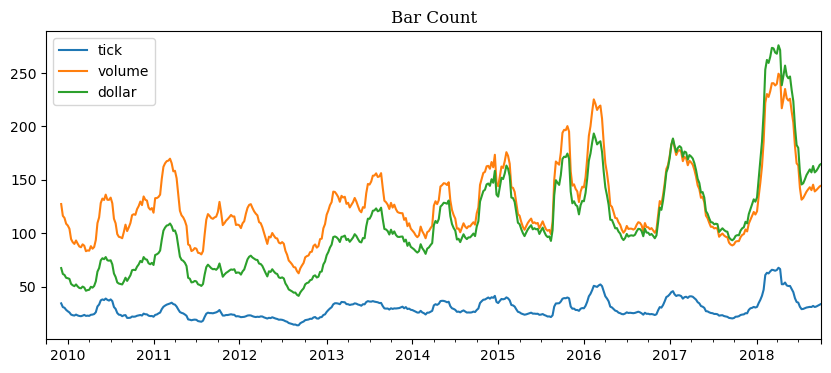

In [43]:
count_df.iloc[:,1:].rolling(window = 10).mean().plot(figsize = (10,4))
plt.title('Bar Count', fontfamily = 'Serif', fontsize = 12)

#### Sample Sationarity

In [44]:
time_returns = np.log(data['price']).diff().dropna()
tick_returns = np.log(tick['close']).diff().dropna()
volume_returns = np.log(volume['close']).diff().dropna()
dollar_returns = np.log(dollar['close']).diff().dropna()

In [45]:
time_standard = (time_returns - time_returns.mean()) / time_returns.std()
tick_standard = (tick_returns - tick_returns.mean()) / tick_returns.std()
volume_standard = (volume_returns - volume_returns.mean()) / volume_returns.std()
dollar_standard = (dollar_returns - dollar_returns.mean()) / dollar_returns.std()

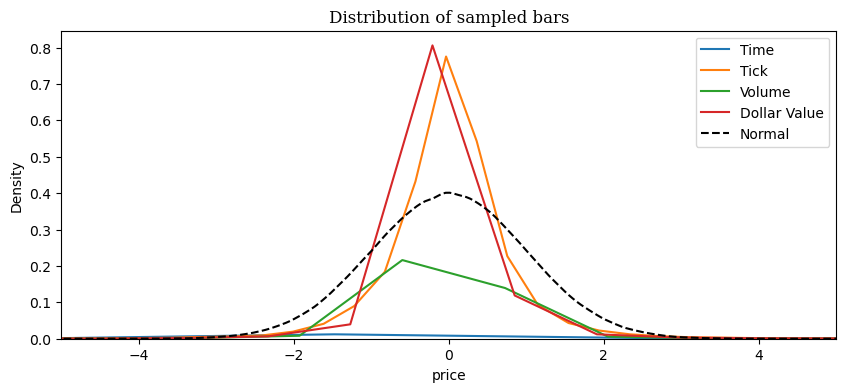

In [55]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10,4))
sns.kdeplot(time_standard, label = "Time", ax = ax)
sns.kdeplot(tick_standard, label = "Tick", ax = ax)
sns.kdeplot(volume_standard, label = "Volume", ax = ax)
sns.kdeplot(dollar_standard, label = "Dollar Value", ax = ax)
sns.kdeplot(np.random.normal(size=1000000), label="Normal", 
            color='black', linestyle="--", ax = ax)
plt.legend()
plt.xlim(-5, 5)
plt.title('Distribution of sampled bars', fontfamily = 'Serif', fontsize = 12)
plt.show()